### Simple front end for photo identity app 

* A more user friendly way to test/experiment with the app without having to use a tool like Postman, while also providing a user with the ability to see the photos being matched and the ability to view a visual on the match result
* I provided four photos from the [labeled faces in the wild data set](http://vis-www.cs.umass.edu/lfw/) to help with initial testing. 

**Note:** while using LFW is effective for simple testing, please be aware that due to the lack of diversity in the photoset is NOT suitable for benchmarking or training a facial recognition solution for use in a production environment/in the real world with real people. 



In [1]:
import requests 
import json
from test_helper import TestFunctions 

In [2]:
# instantiate the test helper class 
helper = TestFunctions()



In [3]:
# define our identity verification API URLs 

# URL to check that the API is working properly 
health = 'http://0.0.0.0:6000/ping'

# a pair of photos to be verified 
photo_pair = 'http://0.0.0.0:6000/identity'


# a photo and a previously computed tensor of the reference photo 
photo_tensor = 'http://0.0.0.0:6000/cached_data'


In [4]:
# define our test photos 

reference = 'images/Allyson_Felix_0001.jpg' 
evaluated = 'images/Allyson_Felix_0002.jpg'

reference_a = 'images/George_Karl_0001.jpg'
evaluated_a = 'images/Gregg_Popovich_0002.jpg'

reference_b = 'cpu_tensors/Aaron_Sorkin_0001.pt'
reference_b_photo = 'images/Aaron_Sorkin_0001.jpg'
evaluated_b = 'images/Aaron_Sorkin_0002.jpg'





CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 2.38 µs


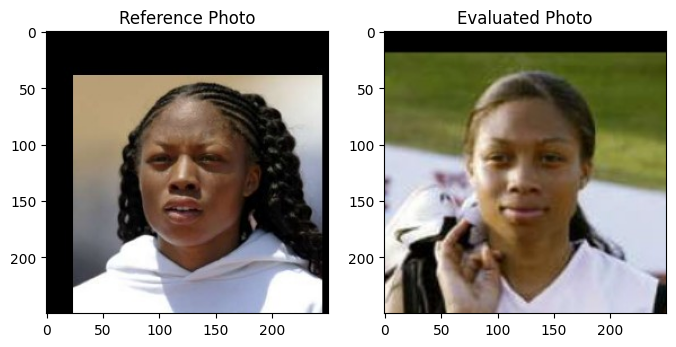

In [5]:
%time 

# show the photos side by side 

# open the images 
photo1, photo2 = helper.open_images(reference, evaluated)

# display the images 
helper.show_images(photo1, photo2)


In [6]:
%%time 

# first we check the API to make sure that everything is working properly 

response = requests.request("GET", health)
print(f'The response from the API is: {response.text}')



The response from the API is: {"API Status": 200}
CPU times: user 4.58 ms, sys: 8.73 ms, total: 13.3 ms
Wall time: 4.59 ms


In [7]:
%%time 

# now that we know the API is functioning properly we need to ping the API with a pair of photos 

payload={'type': "cosine", 'threshold': 0.35}

files = {'reference': open(reference, 'rb'),
         'sample': open(evaluated, 'rb')}

headers = {}


response = requests.post(photo_pair, headers = headers, data = payload, files = files)

# make sure the files are closed 
for file in files.values():
  file.close()


# convert the JSON to a python dictionary for a) better readability b) so we can parse out the match status 
# convert the JSON string to a python dictionary 
response_json = json.loads(response.text)
response_json

CPU times: user 18.5 ms, sys: 27.2 ms, total: 45.8 ms
Wall time: 250 ms


{'Match Status': 1,
 'Score': 0.215,
 'Score Type': 'cosine distance',
 'Score Threshold': 0.35,
 'Inferencing Latency': '238.61 ms'}

CPU times: user 33.6 ms, sys: 734 µs, total: 34.3 ms
Wall time: 34.5 ms


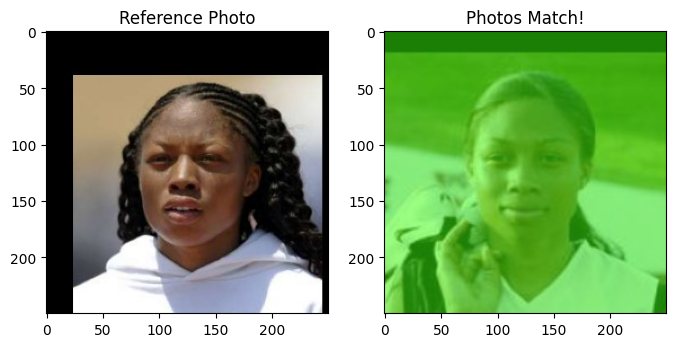

In [8]:
%%time 

# parse out the match status and send the photos + the status to the method that will display the photos
# with green tinting for a match and red tinting for photos that don't match 

# parse out the match status 
status = response_json['Match Status']

# ping the method to display the photos with the appropriate tinting 
helper.display_results(photo1, photo2, status)



CPU times: user 32 ms, sys: 48.8 ms, total: 80.9 ms
Wall time: 26.6 ms


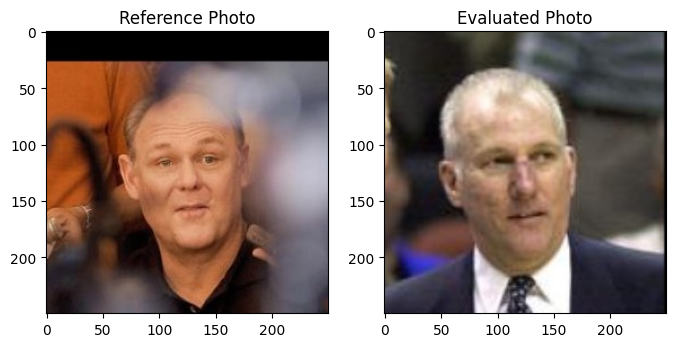

In [9]:
%%time 

# for a quick sanity check let's try it again with two photos that don't match 

# show the photos side by side 

# open the images 
photo3, photo4 = helper.open_images(reference_a, evaluated_a)

# display the images 
helper.show_images(photo3, photo4)


In [10]:
%%time 

# send the photos to the API for comparison 

payload={'type': "cosine", 'threshold': 0.35}


files = {'reference': open(reference_a, 'rb'),
         'sample': open(evaluated_b, 'rb')}

headers = {}

second_response = requests.post(photo_pair, headers = headers, data = payload, files = files)

# make sure the files are closed 
for file in files.values():
  file.close()


# convert the JSON to a python dictionary for a) better readability b) so we can parse out the match status 
# convert the JSON string to a python dictionary 
second_response_json = json.loads(second_response.text)
second_response_json



CPU times: user 30.9 ms, sys: 82 ms, total: 113 ms
Wall time: 184 ms


{'Match Status': 0,
 'Score': 0.993,
 'Score Type': 'cosine distance',
 'Score Threshold': 0.35,
 'Inferencing Latency': '173.13 ms'}

CPU times: user 20.1 ms, sys: 4.11 ms, total: 24.2 ms
Wall time: 22.9 ms


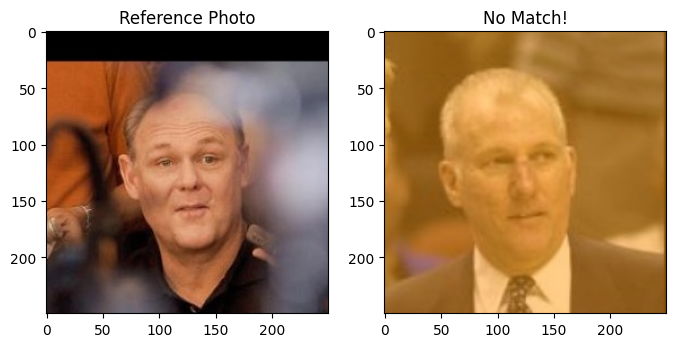

In [11]:
%%time 


# parse out the match status and send the photos + the status to the method that will display the photos
# with green tinting for a match and red tinting for photos that don't match 

# parse out the match status 
status = second_response_json['Match Status']

# ping the method to display the photos with the appropriate tinting 
helper.display_results(photo3, photo4, status)

CPU times: user 35.3 ms, sys: 27.1 ms, total: 62.4 ms
Wall time: 20.7 ms


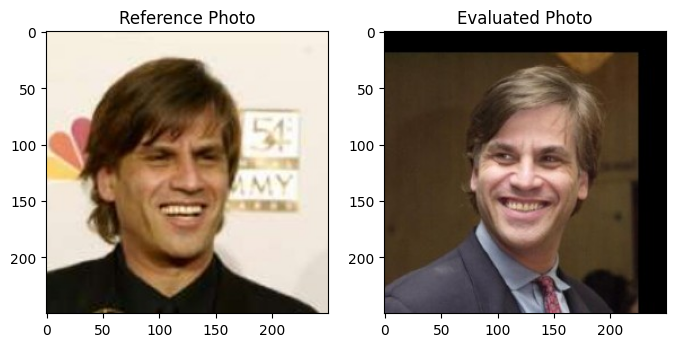

In [12]:
%%time 

# now we'll test a photo vs a pre-calculated set of tensors of the reference photo 

# show the photos side by side, in this case we're using the original photo, but we'll be comparing the photo on the right 
# to a pre-prepared tensor from the photo on the left. 

# open the images 
photo5, photo6 = helper.open_images(reference_b_photo, evaluated_b)

# display the images 
helper.show_images(photo5, photo6)



In [13]:
%%time 

# test sending a photo and a tensor of a reference photo 

payload={'type': "cosine", 'threshold': 0.35}

files = {'reference': open(reference_b, 'rb'),
         'sample': open(evaluated_b, 'rb')}

headers = {}

third_response = requests.post(photo_tensor, headers = headers, data = payload, files = files)

# make sure the files are closed 
for file in files.values():
  file.close()

# convert the JSON to a python dictionary for a) better readability b) so we can parse out the match status 
# convert the JSON string to a python dictionary 
third_response_json = json.loads(third_response.text)
third_response_json




CPU times: user 26 ms, sys: 90.4 ms, total: 116 ms
Wall time: 125 ms


{'Match Status': 1,
 'Score': 0.28,
 'Score Type': 'cosine distance',
 'Score Threshold': 0.35,
 'Inferencing Latency': '116.52 ms'}

CPU times: user 22.9 ms, sys: 0 ns, total: 22.9 ms
Wall time: 22.1 ms


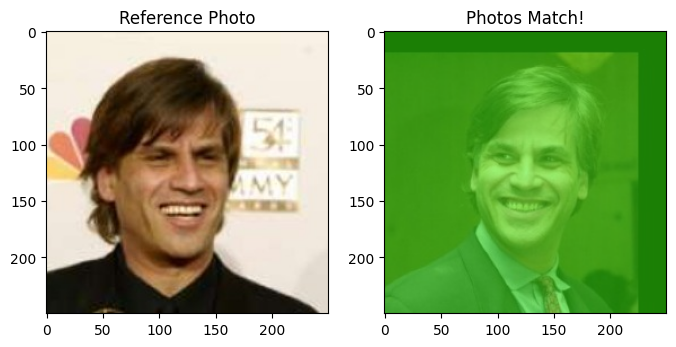

In [14]:
%%time 

# parse out the match status for the cached photos, use the original photo for displaying the match status 
# with green tinting for a match and red tinting for photos that don't match 

# parse out the match status 
status = third_response_json['Match Status']

# ping the method to display the photos with the appropriate tinting 
helper.display_results(photo5, photo6, status)